## Amenza lluvia 

In [1]:
from rain_way import rain_test

In [2]:
nsa = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\4_Rain\02_NasaGPDX_SouthAmericaV3"

In [3]:
nc = rain_test(nsa)

All share the same coords
Woring on SSP2 4.5

	Modelo : EC-Earth3-Veg-LR

		2020-01-01 2039-12-31


In [12]:
nc

<xarray.Dataset> Size: 118MB
Dimensions:  (time: 7305, lat: 67, lon: 60)
Coordinates:
  * time     (time) datetime64[ns] 58kB 2020-01-01T12:00:00 ... 2039-12-31T12...
  * lat      (lat) float64 536B -4.125 -3.875 -3.625 ... 11.88 12.12 12.38
  * lon      (lon) float64 480B -81.62 -81.38 -81.12 ... -67.38 -67.12 -66.88
Data variables:
    pr       (time, lat, lon) float32 117MB nan nan 0.0 0.0 ... nan nan nan nan
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-06T14:48:46.723043+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-06T14:48:46.723043+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       EC-Earth3-Veg-LR
    cmip6_institution_id:  EC-Earth-Consortium
    cmip6_license:         CC-BY-SA 4.0

In [13]:
nc.to_netcdf("sample.nc")

## Envioromental 

In [1]:
# Define paths

import sys
path_tools = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\Python Code\03_Escalamiento\Articulador\01_FuncionesGlobales"

# Add paths to sys.path if not already present
if path_tools not in sys.path:
    sys.path.append(path_tools)

# Import your modules
import tools

In [2]:
activos = tools.raw_assets()

In [24]:
for linea ,df in activos.groupby('Linea'):

    if df.shape[0] <20:
        print(linea)

Bacatá Noroeste a 230 kV
CARTAGENA - TERMOCANDELARIA 1 220 kV
CARTAGENA - TERMOCANDELARIA 2 220 kV
CERROMATOSO - URE 2 110 KV
Casa de Maquinas - La Miel a  230 kV
Esmeralda - La Hermosa a 230 kV
Malena Primavera a 230 kV
Reforma Guavio a 230 kV
Reforma Tunal a 230 kV
Sochagota Paipa a 230 kV
TERMOCANDELARIA - TERNERA 1 220 kV
TERMOCANDELARIA - TERNERA 2 220 kV


In [4]:
for linea,df_linea in activos.groupby('Linea'): 

    break

In [5]:
df_linea

,Torre,Latitud,Longitud,Linea,CTE
19392,1,2.500460,-76.593628,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE
19393,2,2.504572,-76.594721,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE
19394,3,2.508899,-76.595873,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE
19395,4,2.513576,-76.597122,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE
19396,5,2.518122,-76.598326,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE
...,...,...,...,...,...
19579,189,3.351365,-76.494879,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE
19580,190,3.355609,-76.492292,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE
19581,191,3.359526,-76.489934,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE
19582,192,3.363809,-76.487335,Alférez San Bernardino a 230 kV,CTE SUROCCIDENTE


# 1. Maximun amount

En haras de normalizar los valores de tif , debemos conocer los valores maximmos y minimos . como no podemos abrier todo el tif de pendientes en la memoria , lo que haremos sera iterar extrayendo los maximos y minimos para tener estos valores para las diferentes variables fisicas

In [1]:
import numpy as np
import rasterio as rio
import os
from rasterio.windows import Window
import random

# Load DEM and define the processing workflow
path_global = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\06_InputGeologico\02_Alos_Palsar\dem_COL\terrain_WGS84"

terrain_variables = [
    'curvature_Colombia.tif',
    'planform_curvature_Colombia.tif',
    'profile_curvature_Colombia.tif',
]

for var in terrain_variables:
    print(f"For var {var}\n")

    # Open the raster file
    path_slope = os.path.join(path_global, var)
    raw =  rio.open(path_slope)
    meta = raw.meta
    height, width = meta["height"], meta["width"]

    # Define chunk size and number of windows to sample
    chunk_size = 10_000  
    num_samples = 100  # Adjust the number of random windows

    # Compute all possible window positions
    row_positions = list(range(0, height, chunk_size))
    col_positions = list(range(0, width, chunk_size))
    all_windows = [(r, c) for r in row_positions for c in col_positions]

    print(f"All windows : {len(all_windows)} ")

    # Randomly select a subset of windows
    sampled_windows = random.sample(all_windows, min(num_samples, len(all_windows)))

    print(f"Random picked :{len(sampled_windows)}")
    # Initialize global min and max values
    global_min = np.inf
    global_max = -np.inf
    global_lw_quantile = np.inf
    global_up_quantile = -np.inf

    for row_off, col_off in sampled_windows:
        # Compute window dimensions
        window_height = min(chunk_size, height - row_off)
        window_width = min(chunk_size, width - col_off)
        window = Window(col_off, row_off, window_width, window_height)

        # Read the windowed data as a masked array
        data = raw.read(1, window=window, masked=True).astype(np.float32)

        if data.mask.all():  # Skip fully masked windows
            continue

        if data.mask.any():
            # Filter out masked (nodata) values
            data = data[~data.mask]
            
        if data.size > 0:
            window_min = np.min(data.data)
            window_max = np.max(data.data)
            quantile_95 =  np.quantile(  data.data,q = 0.95)
            quantile_05 =  np.quantile(  data.data,q = 0.95)
            
            # Update global min and max
            global_min = min(global_min, window_min)
            global_max = max(global_max, window_max)
            global_up_quantile = max(global_up_quantile, quantile_95)
            global_lw_quantile = min(global_lw_quantile, quantile_05)
        
    print(f"\nGlobal Min: {global_min}\nGlobal Max: {global_max}\nQuantile upper 95: {global_up_quantile}\nQuantile lower 05: {global_lw_quantile}")


print("\nDone")


For var curvature_Colombia.tif

All windows : 192 
Random picked :100

Global Min: -2150.39990234375
Global Max: 1409.9200439453125
Quantile upper 95: 2.559999942779541
Quantile lower 05: 0.6399999856948853
For var planform_curvature_Colombia.tif

All windows : 192 
Random picked :100

Global Min: -1059.8597412109375
Global Max: 790.6588745117188
Quantile upper 95: 1.5297560691833496
Quantile lower 05: 0.800000011920929
For var profile_curvature_Colombia.tif

All windows : 192 
Random picked :100

Global Min: -485.43951416015625
Global Max: 485.1889953613281
Quantile upper 95: 1.4585407972335815
Quantile lower 05: 0.800000011920929

Done


In [15]:
len(all_windows)

744

In [9]:
data

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0.0,
  dtype=float32)

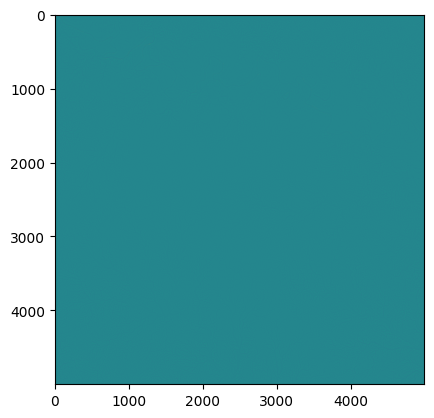

In [19]:
plt.imshow(data.data)

# 2. 

In [7]:
import numpy as np
import rasterio as rio
import xarray as xr
import os
from rasterio.windows import Window



path_folder = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\5_Results\05_LandSlide\Resultados Semillero\IndexWayCarbon"



# Step 1: Load the slope TIFF and create processing windows
def create_windows(dem_transform, lon_min, lon_max, lat_min, lat_max, chunk_size):
    
    min_row, min_col = rio.transform.rowcol(dem_transform, lon_min, lat_max)
    max_row, max_col = rio.transform.rowcol(dem_transform, lon_max, lat_min)

    window_global = Window.from_slices((min_row, max_row), (min_col, max_col))

    (row_start_global, row_end_global), (col_start_global, col_end_global) = window_global.toranges()

    windows = []
    for row_start in range(row_start_global, row_end_global , chunk_size):
        for col_start in range(col_start_global, col_end_global , chunk_size):
            row_end = min(row_start + chunk_size, max_row )
            col_end = min(col_start + chunk_size, max_col )
            window = Window.from_slices((row_start, row_end), (col_start, col_end))
            
            windows.append({
                            'window': window,
                            'row_off': window.row_off,
                            'col_off': window.col_off,
                            'height': window.height,
                            'width': window.width,
                        })
                        
    return windows,window_global,row_start_global,col_start_global


## Step 2: Extract pixel coordinates from each window
def get_pixel_coordinates(transform_global,
                          window_i,

                          xs_coarse,
                          ys_coarse,
                         ):

    window_transform = rio.windows.transform( window_i['window'], transform_global)
    height, width = window_i['height'], window_i['width']
    
    xs, ys = np.meshgrid(np.arange(width), np.arange(height))
    xs_flat, ys_flat = xs.flatten(), ys.flatten()
    
    xs_mapped, ys_mapped = rio.transform.xy(window_transform, ys_flat, xs_flat)

    lon_reshaped_isa = xs_mapped[:, np.newaxis]
    lat_reshaped_isa = ys_mapped[:, np.newaxis]

    # Se acomoda luego el vector de temperatura creando un vector de la forma array([[*,*,..* ]])
    lon_reshaped_cordex = xs_coarse.reshape(1, -1)
    lat_reshaped_cordex = ys_coarse.reshape(1, -1)

    # Con este lo que se hace es replicar el cetor con la latitud y longitud [[*],
    #                                                                         [*],
    #                                                                         [*]]

    lon_reshaped_cordex = np.tile(lon_reshaped_cordex  , (lon_reshaped_isa.shape[0], 1))
    lat_reshaped_cordex = np.tile(lat_reshaped_cordex  , (lat_reshaped_isa.shape[0], 1))

    # Con las formas adecuadas , estos ya se pueden sumar.
    lat_min_idx = np.argmin(np.abs(lat_reshaped_cordex - lat_reshaped_isa),axis = 1)
    lon_min_idx = np.argmin(np.abs(lon_reshaped_cordex - lon_reshaped_isa),axis = 1)

    return lat_min_idx,lon_min_idx,height, width

def extract_slices(window_obj,
                   global_row,
                   global_col):


    window_row_i = window['row_off'] - global_row  
    window_col_i = window['col_off'] - global_col 
    
    return window_row_i,window_col_i


## min_val = np.nanmin(array)
## max_val = np.nanmax(array)
## normalized_array = (array - min_val) / (max_val - min_val)



# Load DEM and define the processing workflow
path_slope = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\06_InputGeologico\02_Alos_Palsar\dem_COL\terrain_WGS84"

nc_file = xr.open_dataset('sample.nc')
dict_coords = nc_file.coords.xindexes.dims.mapping


lon_name = tools.get_coord_name(nc_file, 'lon')
lat_name = tools.get_coord_name(nc_file, 'lat')
time_name = tools.get_coord_name(nc_file, 'time')

ys_coarse = nc_file.lat.values
xs_coarse = tools.convert_longitude_to_minus180_to_180(nc_file.lon.values)

raw_dem = rio.open(os.path.join(path_slope, 'slope_Colombia.tif'), masked=True)
## raw_curvature = rio.open(os.path.join(path_slope, 'curvature_Colombia.tif', masked=True)

dem_transform = raw_dem.transform

rain_coarse = nc_file['pr'].values  # Variable of interest
max_test = np.max(rain_coarse,axis = 0)
filtered_df = activos[activos['Linea'] == 'Porce III Sogamoso a 500 kV'].copy()

# # Define the region of interest
lon_min, lon_max = filtered_df['Longitud'].min(), filtered_df['Longitud'].max()
lat_min, lat_max = filtered_df['Latitud'].min(), filtered_df['Latitud'].max()




In [8]:
# # Create windows
chunk_size = 3_000  # Adjust as needed
windows,window_global,row_start,col_start = create_windows(dem_transform, lon_min, lon_max, lat_min, lat_max, chunk_size)

final_array = np.empty(( window_global.height,   window_global.width))
shape = max_test.shape


for window in windows:

    lat_min_idx,lon_min_idx,height, width = get_pixel_coordinates(dem_transform,
                                                                  window,
                                                                  xs_coarse,
                                                                  ys_coarse,
                                                                 )
    
    
    dim_mapping = tools.map_coords_to_shape(shape, dict_coords)
    
    slice_arrays = {
                    lat_name: lat_min_idx,
                    lon_name: lon_min_idx
                    }
    
    slc = [slice(None)] * len(shape)
    for key, array in slice_arrays.items():
        index_position = dim_mapping[key]
        slc[index_position] = array

    slice_tuple = tuple(slc)

    rain_flat = max_test[slice_tuple]
    rain_numba = rain_flat.reshape(height, width)

    window_row_i,window_col_i = extract_slices(window_obj = window,
                                               global_row =  row_start,
                                                 global_col = col_start)



    final_array[window_row_i: window_row_i + window['height']  ,window_col_i: window_col_i  + window['width']] = rain_numba


In [11]:
import matplotlib.pyplot as plt

In [14]:
window_global

Window(col_off=np.int32(39977), row_off=np.int32(49136), width=np.int32(14513), height=np.int32(4816))

In [15]:
numba_slp = raw_dem.read(1,window =  window_global)

In [22]:
numba_slp

array([[17.432621 , 14.94033  , 23.17183  , ...,  2.29061  ,  1.8112481,
         3.237688 ],
       [16.253918 , 18.64144  , 28.253635 , ...,  2.429397 ,  2.918995 ,
         4.044691 ],
       [13.873369 , 20.594507 , 30.709028 , ...,  5.710593 ,  6.8427734,
         6.8427734],
       ...,
       [23.452175 , 21.261087 , 15.354442 , ..., 19.98092  , 19.253542 ,
        19.827028 ],
       [22.347372 , 20.594507 , 16.611351 , ..., 21.71473  , 20.20197  ,
        20.674463 ],
       [20.243055 , 17.630516 , 15.060032 , ..., 24.094843 , 22.203644 ,
        20.911829 ]], shape=(4816, 14513), dtype=float32)

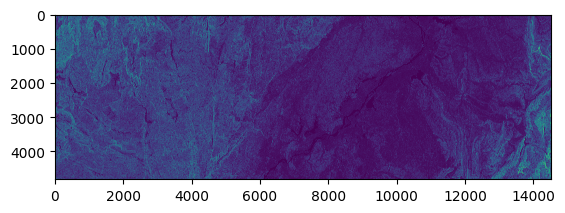

In [16]:
plt.imshow(numba_slp)

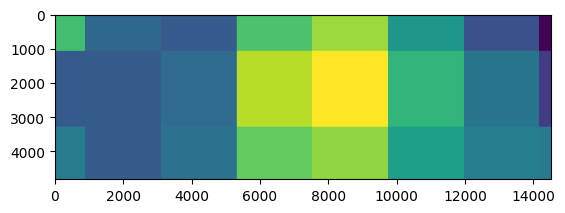

In [12]:
plt.imshow(final_array)

In [21]:
final_array * 86_400

array([[77.1770658 , 77.1770658 , 77.1770658 , ..., 56.17472548,
        56.17472548, 56.17472548],
       [77.1770658 , 77.1770658 , 77.1770658 , ..., 56.17472548,
        56.17472548, 56.17472548],
       [77.1770658 , 77.1770658 , 77.1770658 , ..., 56.17472548,
        56.17472548, 56.17472548],
       ...,
       [69.02384106, 69.02384106, 69.02384106, ..., 68.72628182,
        68.72628182, 68.72628182],
       [69.02384106, 69.02384106, 69.02384106, ..., 68.72628182,
        68.72628182, 68.72628182],
       [69.02384106, 69.02384106, 69.02384106, ..., 68.72628182,
        68.72628182, 68.72628182]], shape=(4816, 14513))

In [19]:
final_array.shape

(4816, 14513)

In [11]:
import matplotlib.pyplot as plt

In [12]:

path_slope = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\06_InputGeologico\02_Alos_Palsar\dem_COL\terrain_WGS84"
rain_path = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\4_Rain\02_NasaGPDX_SouthAmericaV3"


tif_path = os.path.join(path_slope, 'dem_Colombia.tif')


slope_window, transform = extract_window(tif_path, window_slice)
xs_fine, ys_fine = get_pixel_coordinates(transform, slope_window.shape)



## xs_coarse, ys_coarse, rain_coarse = load_coarse_data(os.path.join(rain_path , 'SAM_pr_EC-Earth3-Veg-LR_historical_2.nc') , 'pr')
## mapped_values = map_coarse_to_fine(xs_fine, ys_fine, xs_coarse, ys_coarse, rain_coarse)


In [13]:
xs_fine

array([-75.54775376, -75.54764087, -75.54752799, ..., -75.42312949,
       -75.4230166 , -75.42290372], shape=(11661138,))

In [14]:
ys_fine

array([9.12235475, 9.12235475, 9.12235475, ..., 7.93334439, 7.93334439,
       7.93334439], shape=(11661138,))

In [21]:
os.listdir(rain_path)[:5]

['readme.txt',
 'SAM_pr_EC-Earth3-Veg-LR_historical_1.nc',
 'SAM_pr_EC-Earth3-Veg-LR_historical_2.nc',
 'SAM_pr_EC-Earth3-Veg-LR_historical_3.nc',
 'SAM_pr_EC-Earth3-Veg-LR_ssp245_1.nc']

In [16]:
height, width = slope_window.shape
xs, ys = np.meshgrid(np.arange(width), np.arange(height))

In [17]:
xs

array([[   0,    1,    2, ..., 1104, 1105, 1106],
       [   0,    1,    2, ..., 1104, 1105, 1106],
       [   0,    1,    2, ..., 1104, 1105, 1106],
       ...,
       [   0,    1,    2, ..., 1104, 1105, 1106],
       [   0,    1,    2, ..., 1104, 1105, 1106],
       [   0,    1,    2, ..., 1104, 1105, 1106]], shape=(10534, 1107))

In [18]:
ys

array([[    0,     0,     0, ...,     0,     0,     0],
       [    1,     1,     1, ...,     1,     1,     1],
       [    2,     2,     2, ...,     2,     2,     2],
       ...,
       [10531, 10531, 10531, ..., 10531, 10531, 10531],
       [10532, 10532, 10532, ..., 10532, 10532, 10532],
       [10533, 10533, 10533, ..., 10533, 10533, 10533]],
      shape=(10534, 1107))

In [19]:
rasterio.transform.xy(transform, 0, 0)

(np.float64(-75.54775375670303), np.float64(9.122354746832906))

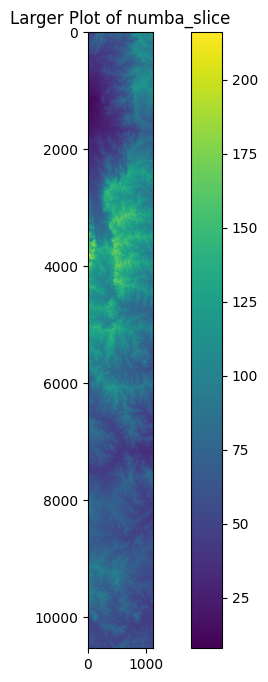

In [21]:
# Create a larger plot
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
plt.imshow(numba_slice, cmap='viridis')  # You can change the colormap if desired
plt.colorbar()  # Add a colorbar for reference
plt.title('Larger Plot of numba_slice')
plt.show()

In [41]:
path_rain = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\4_Rain\02_NasaGPDX_SouthAmericaV3"

In [42]:
os.listdir(path_rain)[:5]

['readme.txt',
 'SAM_pr_EC-Earth3-Veg-LR_historical_1.nc',
 'SAM_pr_EC-Earth3-Veg-LR_historical_2.nc',
 'SAM_pr_EC-Earth3-Veg-LR_historical_3.nc',
 'SAM_pr_EC-Earth3-Veg-LR_ssp245_1.nc']

In [43]:
import xarray as xr

In [45]:
ls = xr.open_dataset(os.path.join(path_rain,'SAM_pr_EC-Earth3-Veg-LR_historical_3.nc'))

In [46]:
ls

<xarray.Dataset> Size: 771MB
Dimensions:  (time: 3652, lat: 268, lon: 197)
Coordinates:
  * time     (time) datetime64[ns] 29kB 2005-01-01T12:00:00 ... 2014-12-31T12...
  * lat      (lat) float64 2kB -53.38 -53.12 -52.88 -52.62 ... 12.88 13.12 13.38
  * lon      (lon) float64 2kB 276.1 276.4 276.6 276.9 ... 324.6 324.9 325.1
Data variables:
    pr       (time, lat, lon) float32 771MB ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-06T13:35:40.865316+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-06T13:35:40.865316+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       EC-Earth3-Veg-LR
    cmip6_institution_id:  EC-Earth-Consortium
    cmip6_license:         CC-BY-SA 4.0